# Module 07: Logistic Regression

`By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`


## Learning objectives

Upon completion of this module, the learner will be able to:

* Describe and apply basic operations on vectors (review)
  * define a hyperplane
  * define and calculate the distance from a point to a hyperplane
* Define a logistic regression model for the following:
  * binary classification (binomial logistic regression)
  * multiclass (multinomial logistic regression)
  * regularized logistic regression models (lasso, ridge, elastic net)
* Score a test case for a binomial or multinomial logistic regression model:
  * Calculate perpendicular distances
  * Make all distances positive by exponentiation
  * Convert these to probabilities via normalization
* Express logistic regression in graph and matrix form
* Define logistic loss and cross-entropy (CXE)
* Define and derive the gradient for bi/multinomial logistic regression objective functions

## Stretch Goals
These goals are optional, for learners who want to understand the theory and implementation details. 

* Define and write code to calculate perpendicular distance to a separating hyperplane
* Implement bi/multinomial logistic regression learning algorithm from from scratch
  * Extend it to penalized logistic regression
* Derive the logistic regression gradient from scratch
* Approximate the gradient numerically


# Logistic regression review

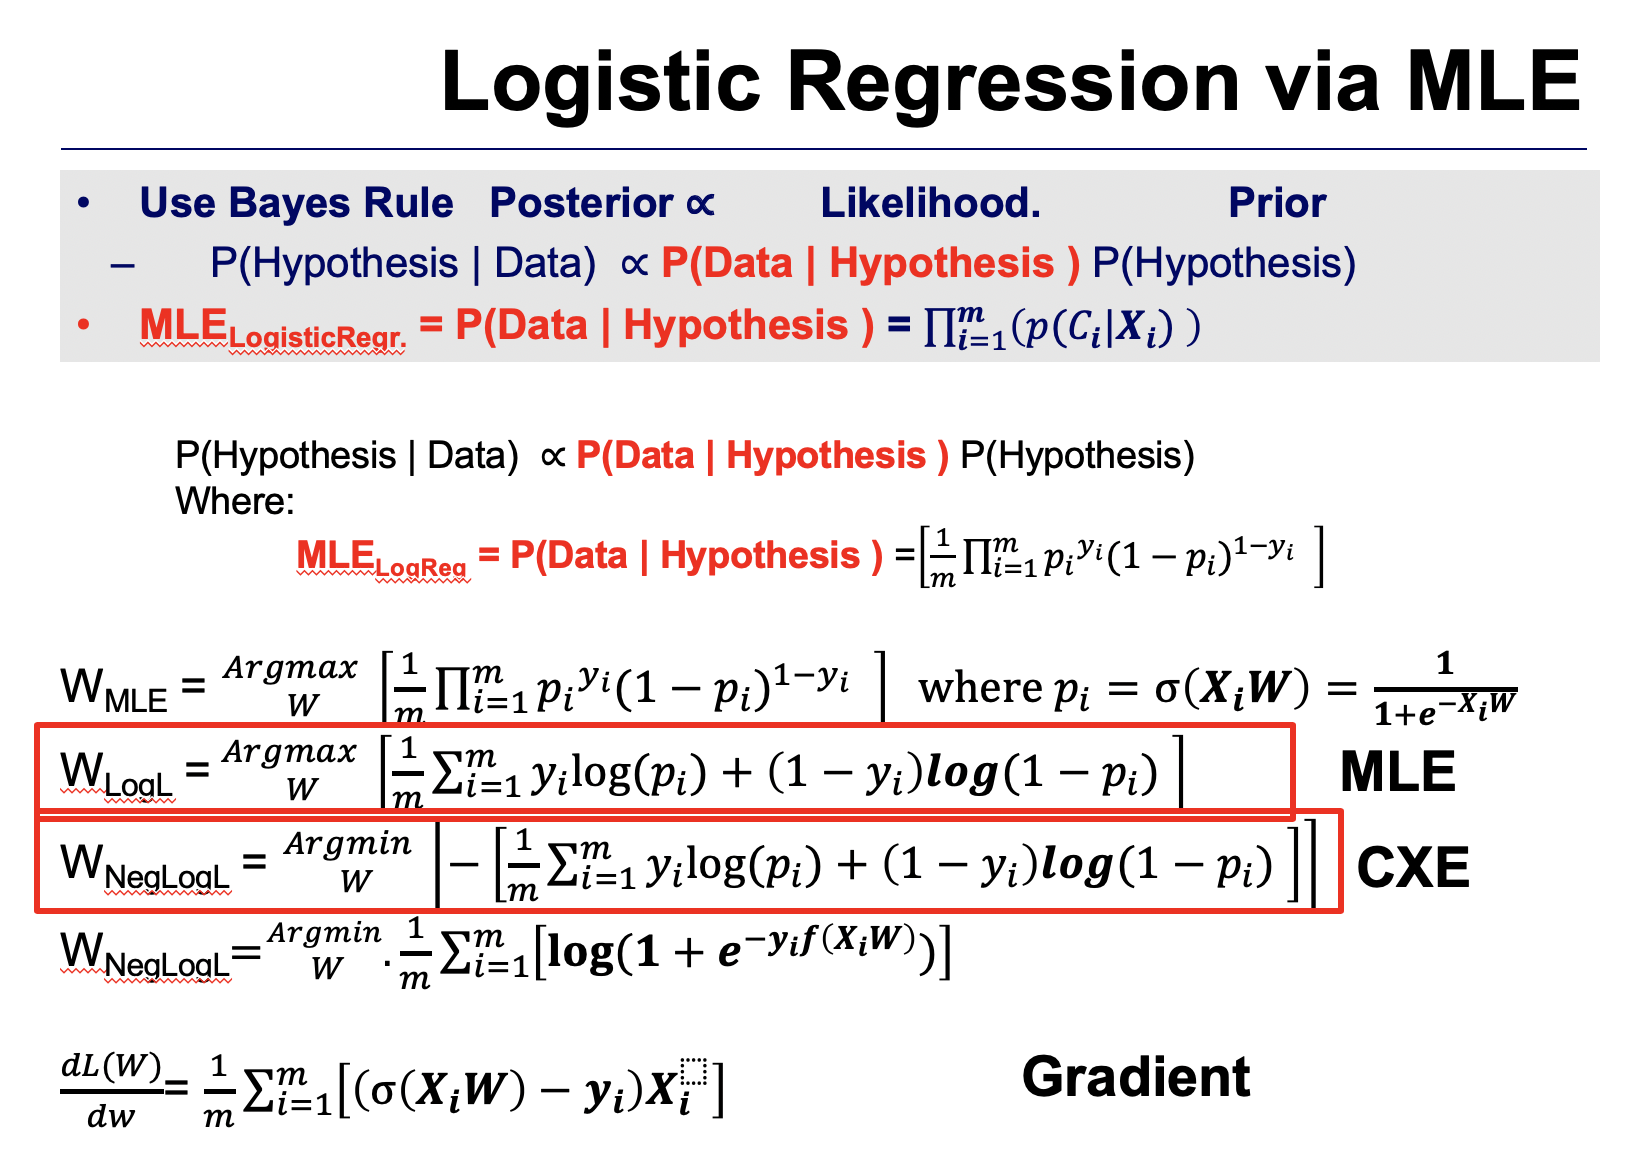

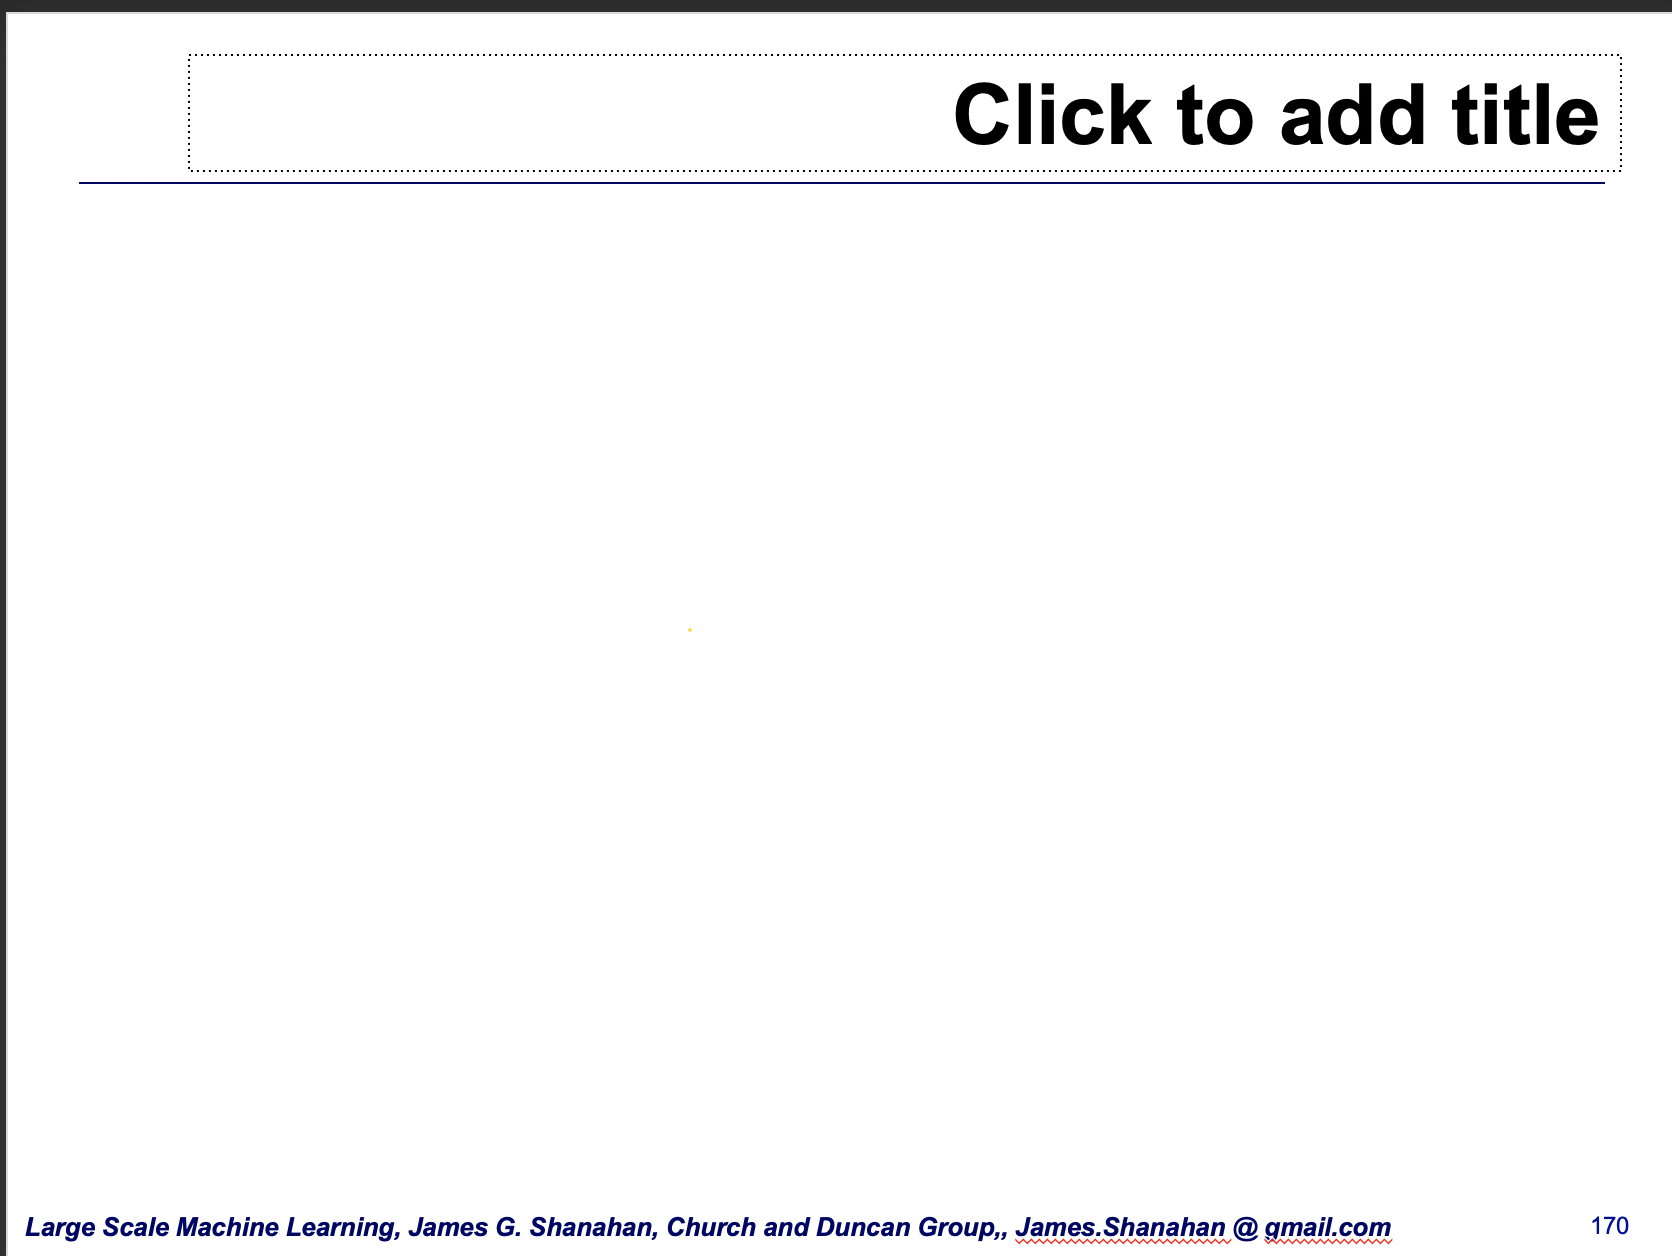

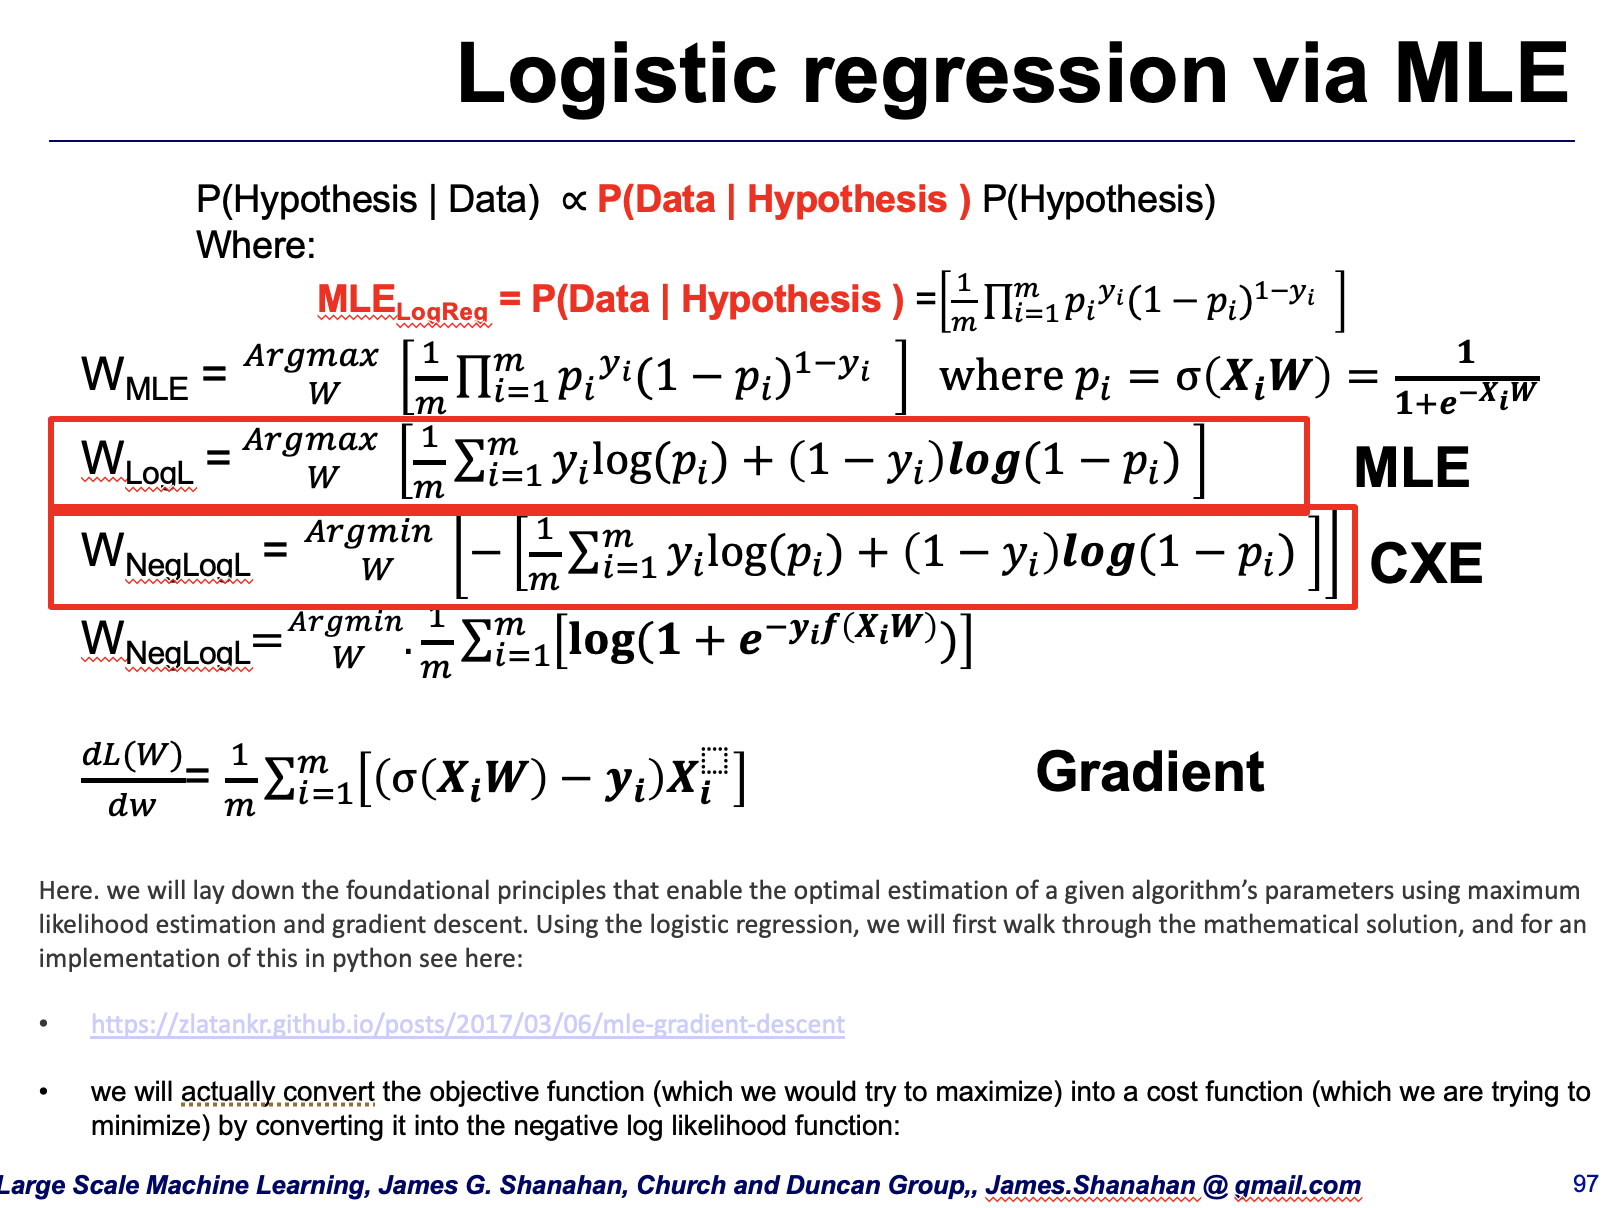

## Deriving the Gradient Equation for logistic regression

For more details on deriving  the Gradient Equation for logistic regression see [here](https://web.stanford.edu/~jurafsky/slp3/5.pdf)


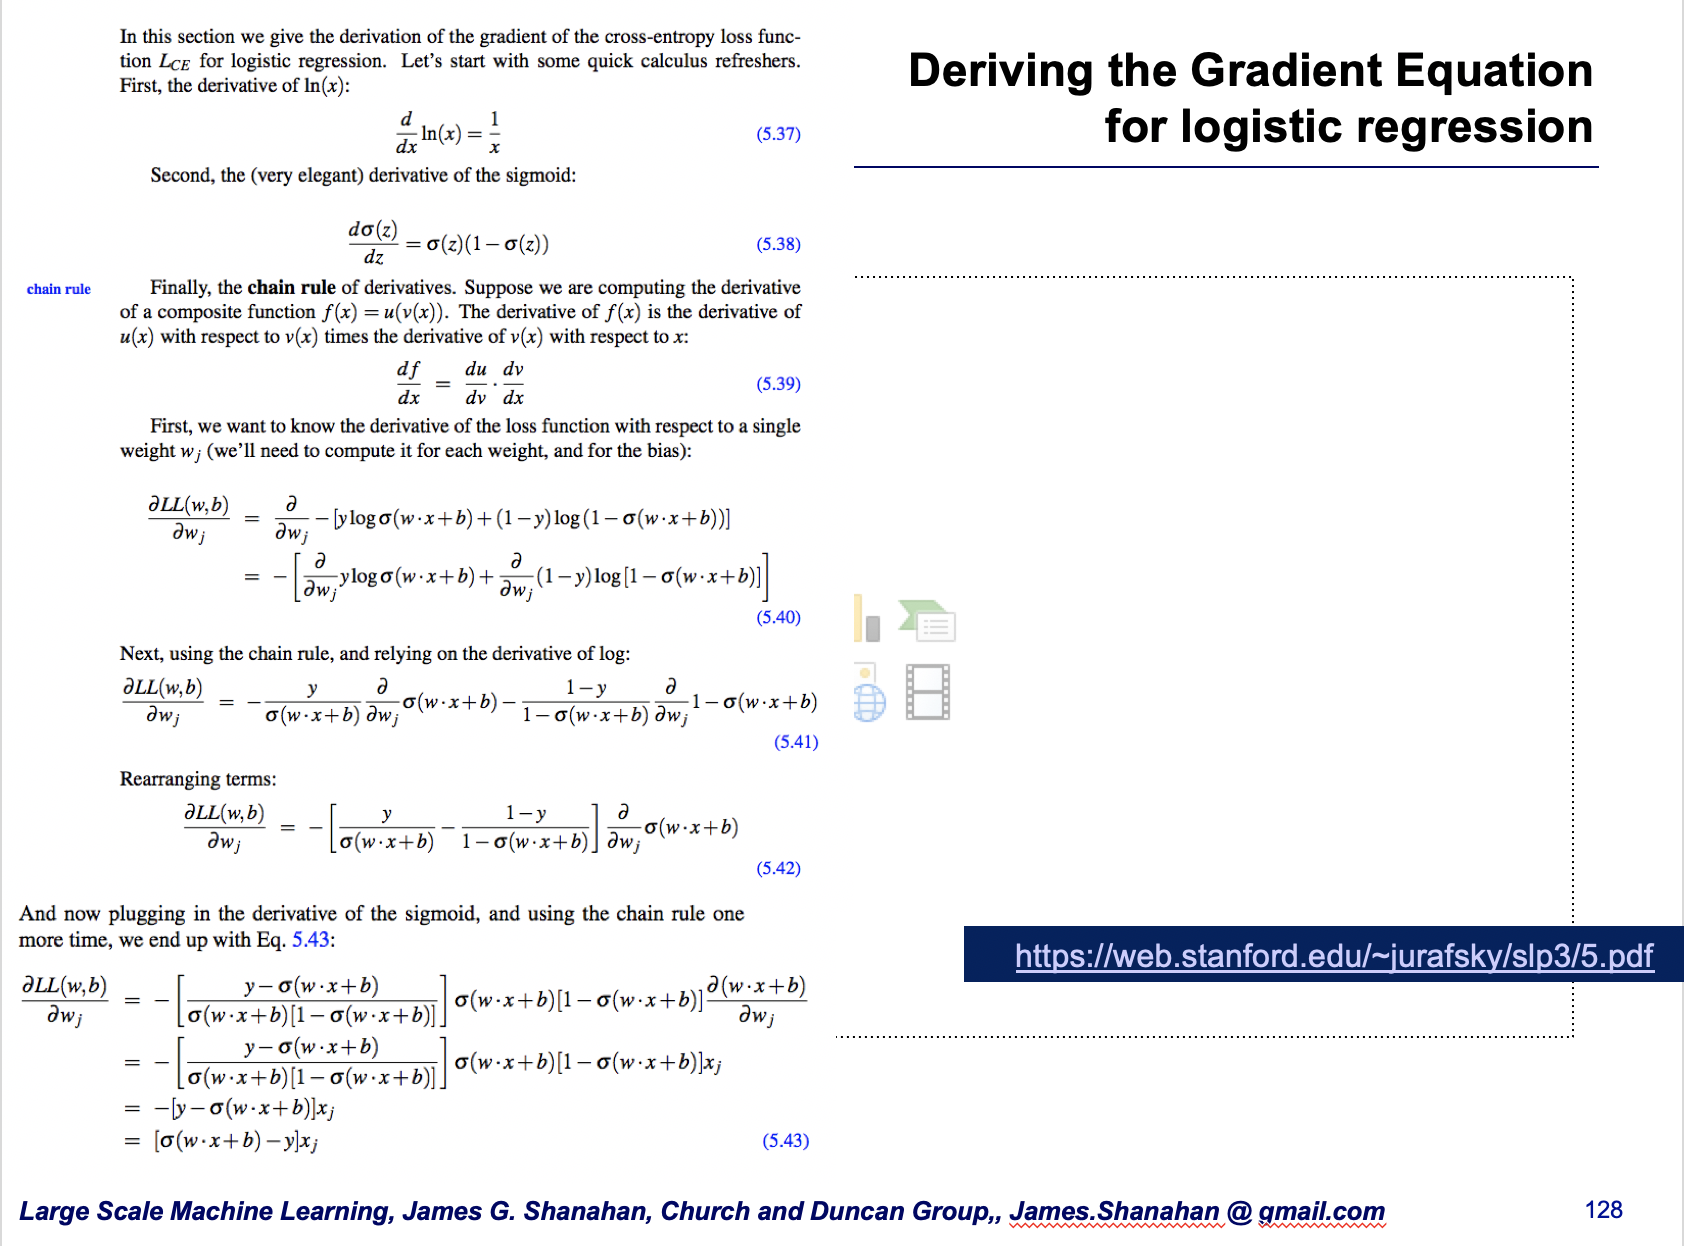

### Binomial logistic regression

Binomial logistic regression| <div style="width:400px">equation</div> |Eqn #
-----|:-------|---------
Logistic function| $ \sigma(t) = \dfrac{1}{1 + \exp(-t)} $ | Eqn 1.
Logistic Regression model prediction|$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$| Eqn 2.
Cost function of a single training instance|$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$|Eqn 3.
Logistic Regression cost function (log loss)| $
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$|Eqn 4.
Logistic cost function partial derivatives| $
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$|Eqn 5.


### Multinomial logistic regression|

Multinomial logistic regression| <div style="width:400px">equation</div> |Eqn #
-----|:-------|---------
Softmax score for class k|$ s_k(\mathbf{x}) = ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} $|Eqn 1.
Softmax function| $
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$|Eqn 2.
Softmax Regression classifier prediction|$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$|Eqn 3.
Cross entropy cost function| $
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$|Eqn 4.
Cross entropy gradient vector for class _k_|$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$|Eqn 5.


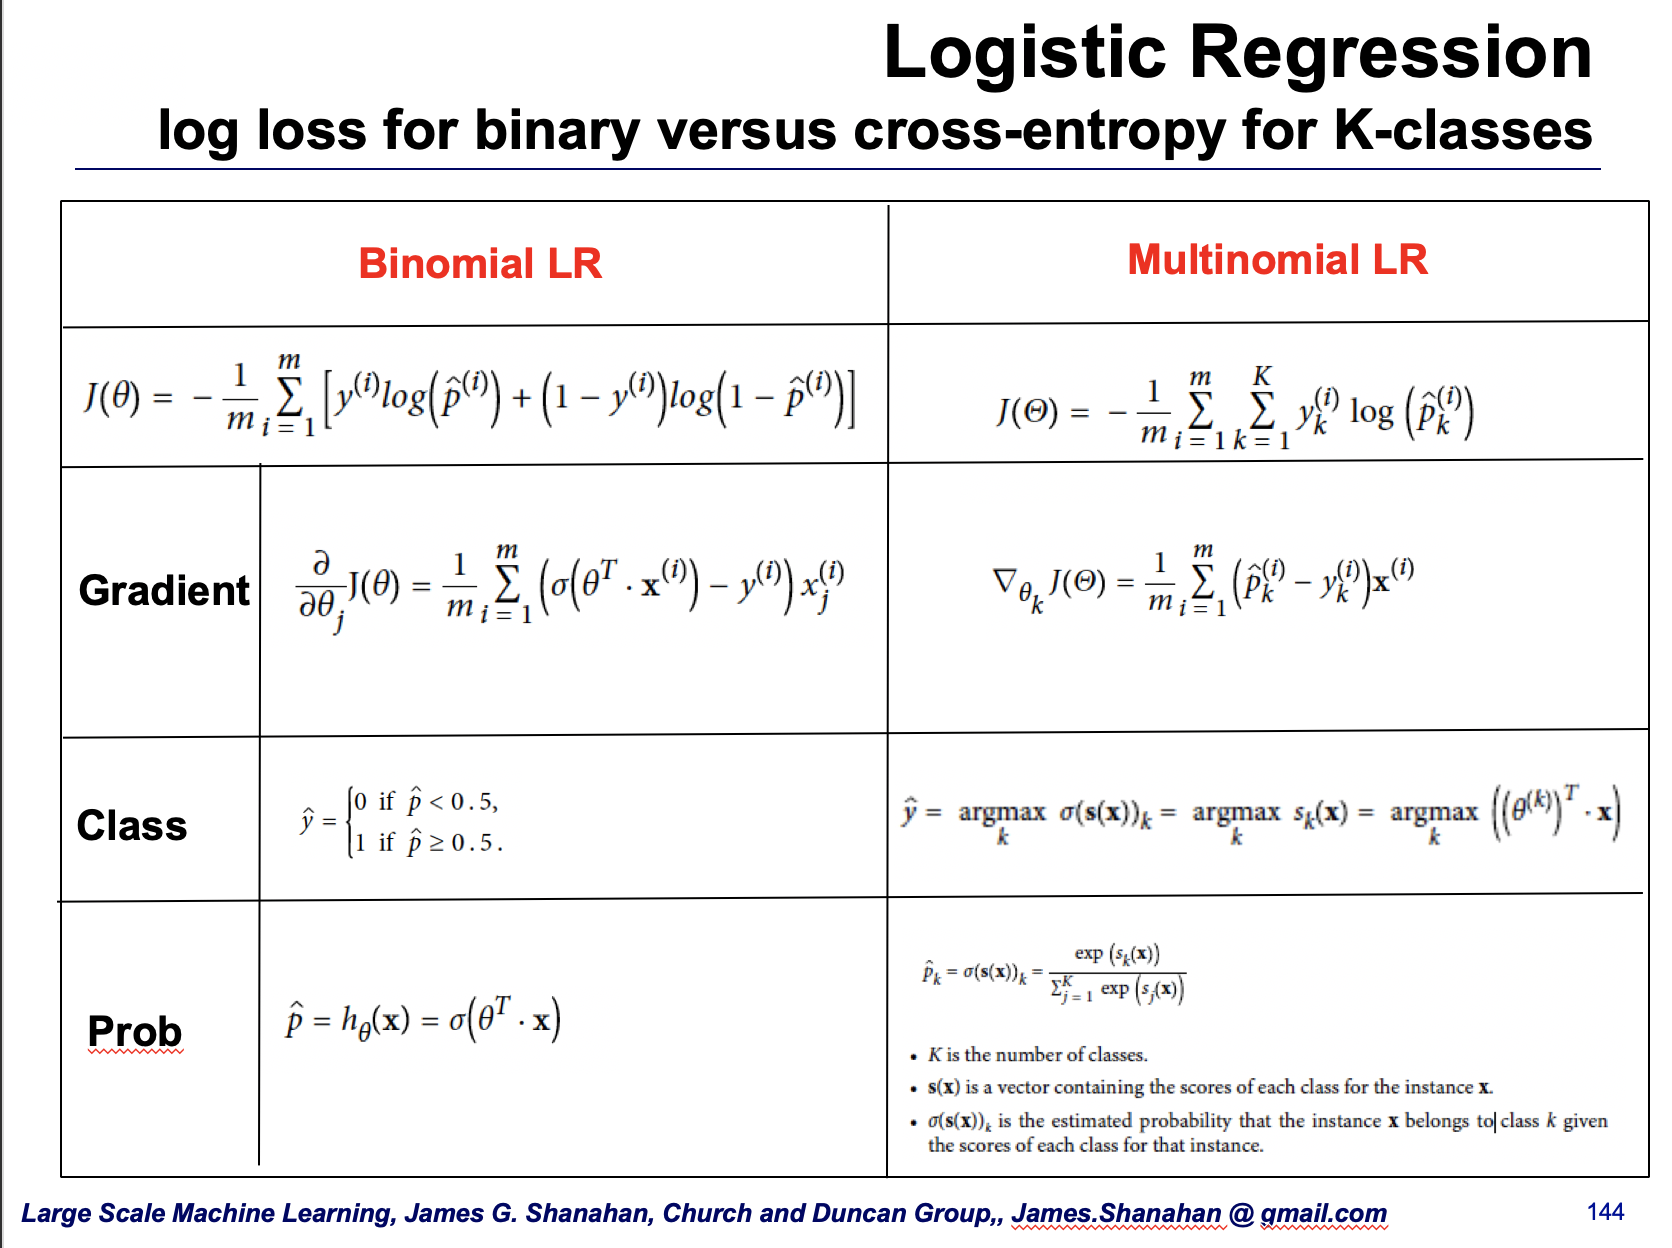

# Quizzes

## Task

Consider a three-class classification problem with the following separating hyperplanes:

$$
\begin{align}
x_1 + x_2 - 2 = 0 & & 1^{\text{st}} \text{ class}\\
-4x_1 + 3x_2 - 11 = 0 & & 2^{\text{nd}} \text{ class}\\
-x_1 - 3x_2 - 1 = 0 & & 3^{\text{rd}} \text{ class}
\end{align}
$$

Calculate the score (unnormalized perpendicular distance) for each class for the test case $(x_1, x_2)=(0, 1)$ .

As a response provide all class scores within two decimal digits precision. Provide your response in the form on LMS

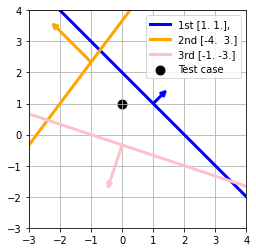

In [1]:
import os

import numpy as np

from sklearn.neighbors import NearestNeighbors

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

W = np.array([[-2., 1., 1],  [-11,-4., 3. ], [-1, -1., -3.]])   #
cs =["b", "orange", "pink"] #colors

x = np.arange(-3, 5)
plt.plot(x, (2. - 1. * x) / 1., c = cs[0], label= f"1st {W[0,1:]},", lw=3)
plt.plot(x, (11. + 4. * x) / 3., c = cs[1], label=f"2nd {W[1,1:]}", lw=3)
plt.plot(x, (-1. - 1. * x) / 3., c = cs[2], label=f"3rd {W[2,1:]}", lw=3)
plt.gca().set_aspect('equal', adjustable='box') 
plt.scatter([0], [1], c="k", s=80, label = "Test case")  #plot the test case

#plot vectors that are normal each hyperplane
i=0; plt.annotate("", xy=W[i,1:]+[0.5, 0.5], c = cs[i], xytext=W[i,1:], arrowprops=dict(fc=cs[i], ec=cs[i],lw=3, arrowstyle="->"))
i=1; plt.annotate("", xy=[-1*4/3. + -1, 1*4/3+7./3.], c = cs[i], xytext=(-1, 7./3.), arrowprops=dict(fc=cs[i], ec=cs[i],lw=3, arrowstyle="->"))
i=2; plt.annotate("", xy=[-0.5, (-0.5/0.333)-0.333], c = cs[i], xytext=[-0.0, -0.333], arrowprops=dict(fc=cs[i], ec=cs[i],lw=3, arrowstyle="->"))
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.grid()
plt.legend()
plt.show()

In [2]:
W = np.transpose(np.array([[1., 1.], 
              [-4., 3.], 
              [-1., -3.]])).reshape(2, 3)
b = np.array([[-2.], 
              [-11.], 
              [-1.]])

b=np.array([-2., -11.,-1.])

In [3]:
W = np.array([[-2., 1., 1],  [-11,-4., 3. ], [-1, -1., -3.]])   #
W

array([[ -2.,   1.,   1.],
       [-11.,  -4.,   3.],
       [ -1.,  -1.,  -3.]])

In [4]:
#Test case
x = np.array([0., 1.]) 
x = np.array([ [1, 0., 1.] ])  #augmented test case



In [5]:
print(W)
print(x)
print("Perp distances are: ",FILL IN YOUR CODE)

SyntaxError: invalid syntax (<ipython-input-5-2b2ecaf8e3d2>, line 3)

In [7]:
print("W", W)
print("x", x)
print("Perp distances are: ",np.dot(x, W)+b)

W [[ -2.   1.   1.]
 [-11.  -4.   3.]
 [ -1.  -1.  -3.]]
x [[1. 0. 1.]]
Perp distances are:  [[ -5. -11.  -3.]]


### Answer

In [8]:
scores1(W, b, x)

NameError: name 'scores1' is not defined

#### Answer In vectorized form

Consider a three-class classification problem with the following separating hyperplanes:

$$
\begin{align}
x_1 + x_2 - 2 = 0 & & 1^{\text{st}} \text{ class}\\
-4x_1 + 3x_2 - 11 = 0 & & 2^{\text{nd}} \text{ class}\\
-x_1 - 3x_2 - 1 = 0 & & 3^{\text{rd}} \text{ class}
\end{align}
$$

Calculate the score (unnormalized perpendicular distance) for each class for the test case $(x_1, x_2)=(0, 1)$ .

As a response provide all class scores within two decimal digits precision. Provide your response in the form on LMS

In [9]:
W = np.array([[-2., 1., 1],  [-11,-4., 3. ], [-1, -1., -3.]])   #
X = np.array([ [0., 1.] ] )  #test data set with one example
X = np.array([ [1, 0., 1.] ])  # augmented test data


print("W", W)
print("x", x)
print(f"Perp distances are: {X.dot(W.T)}")
pdists = X.dot(W.T)
np.round(np.exp(pdists)/np.sum(np.exp(pdists)), 3)

W [[ -2.   1.   1.]
 [-11.  -4.   3.]
 [ -1.  -1.  -3.]]
x [[1. 0. 1.]]
Perp distances are: [[-1. -8. -4.]]


array([[0.952, 0.001, 0.047]])

## Classification: Probabilities

### Task

Using the setting from question 4 above please calculate the probabilities for each class using softmax.

As a response provide all class probabilities within **five** decimal digits precision. Provide your response in the form on LMS

### Answer

In [10]:
#Test case
x = np.array([0., 1.])
#Model W: 3 hyperplane normals
W = np.transpose(np.array([[1., 1.], 
              [-4., 3.], 
              [-1., -3.]])).reshape(2, 3)

#Model bias terms each class hyperplane
b=np.array([-2., -11.,-1.])
np.round(np.dot(x, W)+b, 3) # STEP 1: perpendicular distances


array([-1., -8., -4.])

#### Answer In vectorized form

In [11]:
W = np.array([[-2., 1., 1],  [-11,-4., 3. ], [-1, -1., -3.]])   #
X = np.array([ [0., 1.] ] )  #test data set with one example
X = np.array([ [1, 0., 1.] ])  # augmented test data

sc = X.dot(W.T) # STEP 1: perpendicular distances
sc_exp = np.exp(sc) # STEP 2: make all distances positive
probs = sc_exp / np.sum(sc_exp)  # STEP 3: normalize to get probabilities


print("W", W)
print("x", x)
print(f"Perp distances are: {X.dot(W.T)}")
print(f"Class Probs are:    {np.round(probs, 3)}")


W [[ -2.   1.   1.]
 [-11.  -4.   3.]
 [ -1.  -1.  -3.]]
x [0. 1.]
Perp distances are: [[-1. -8. -4.]]
Class Probs are:    [[0.952 0.001 0.047]]


In [12]:
import numpy as np
np.exp(-1)

0.36787944117144233

In [13]:
np.exp(-1)+np.exp(1)

3.0861612696304874

In [14]:
np.exp(1)/(np.exp(-1)+np.exp(1))

0.8807970779778824

In [15]:
1/(1+np.exp(-1*1))

0.7310585786300049

## Classification: Predict Class

### Task

Take the data from question 5 above and predict the right class.

Provide the number of a class ($1$, $2$ or $3$) as an answer.

### Answer

In [6]:
def predict_class(W, b, x):
    prob = probas(W, b, x)
    return np.argmax(prob) + 1

In [7]:
predict_class(W, b, x)

NameError: name 'probas' is not defined

## Quiz Task: please complete by your self
Consider a three-class classification problem with the following separating hyperplanes:

$$
\begin{align}
5x_1 + x_2 - 2 = 0 & & 1^{\text{st}} \text{ class}\\
-2x_1 + 3x_2 - 11 = 0 & & 2^{\text{nd}} \text{ class}\\
-3x_1 - 3x_2 - 1 = 0 & & 3^{\text{rd}} \text{ class}
\end{align}
$$

Calculate the score (unnormalized perpendicular distance) for each class for the test case $(x_1, x_2)=(0, 1)$ . As a response provide all class scores within two decimal digits precision. 

What is the class of thus test case?
What is the probability of the winning class of the test case?

# Case study: Iris: Build a classifier Iris dataset

In this notebook we're going to investigate highly renowned "Fisher's Iris" dataset for classifcation. It contains 3 classes of iris flowers along with 4 features for each flower. The task is to classify each object judging by this 4 features.

## Preparation

In [16]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Set style for plotting

In [17]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Fix random seed for reproducibility

In [18]:
np.random.seed(42)

## Reading data

Iris dataset is extremely common in machine learning experiments thus it is embedded in sklearn.

In [19]:
iris = load_iris()

Detailed description of dataset and features

In [20]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Create pandas dataframe with objects in rows and features in columns

In [21]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [22]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Below there are the names of the classes for the further use

In [24]:
class_labels = ["setosa", "versicolour", "virginica"]

All the features here are continuous numerical features

Let's also take a look into correlation matrix of features

<ipython-input-25-d627f205dd93>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


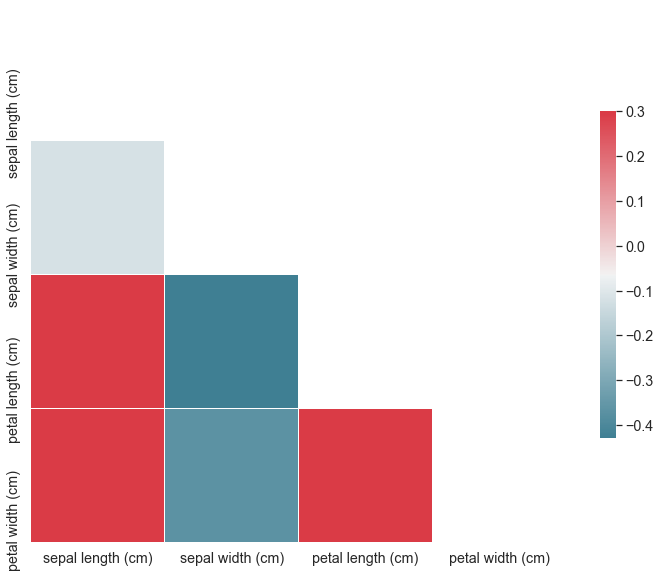

In [25]:
# compute the correlation matrix
corr = X.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

Sometimes it's worth to take a look into paiwise features distributions. In some cases it becomes obvious how to separate classes and build a classifier

C:\Users\parna\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


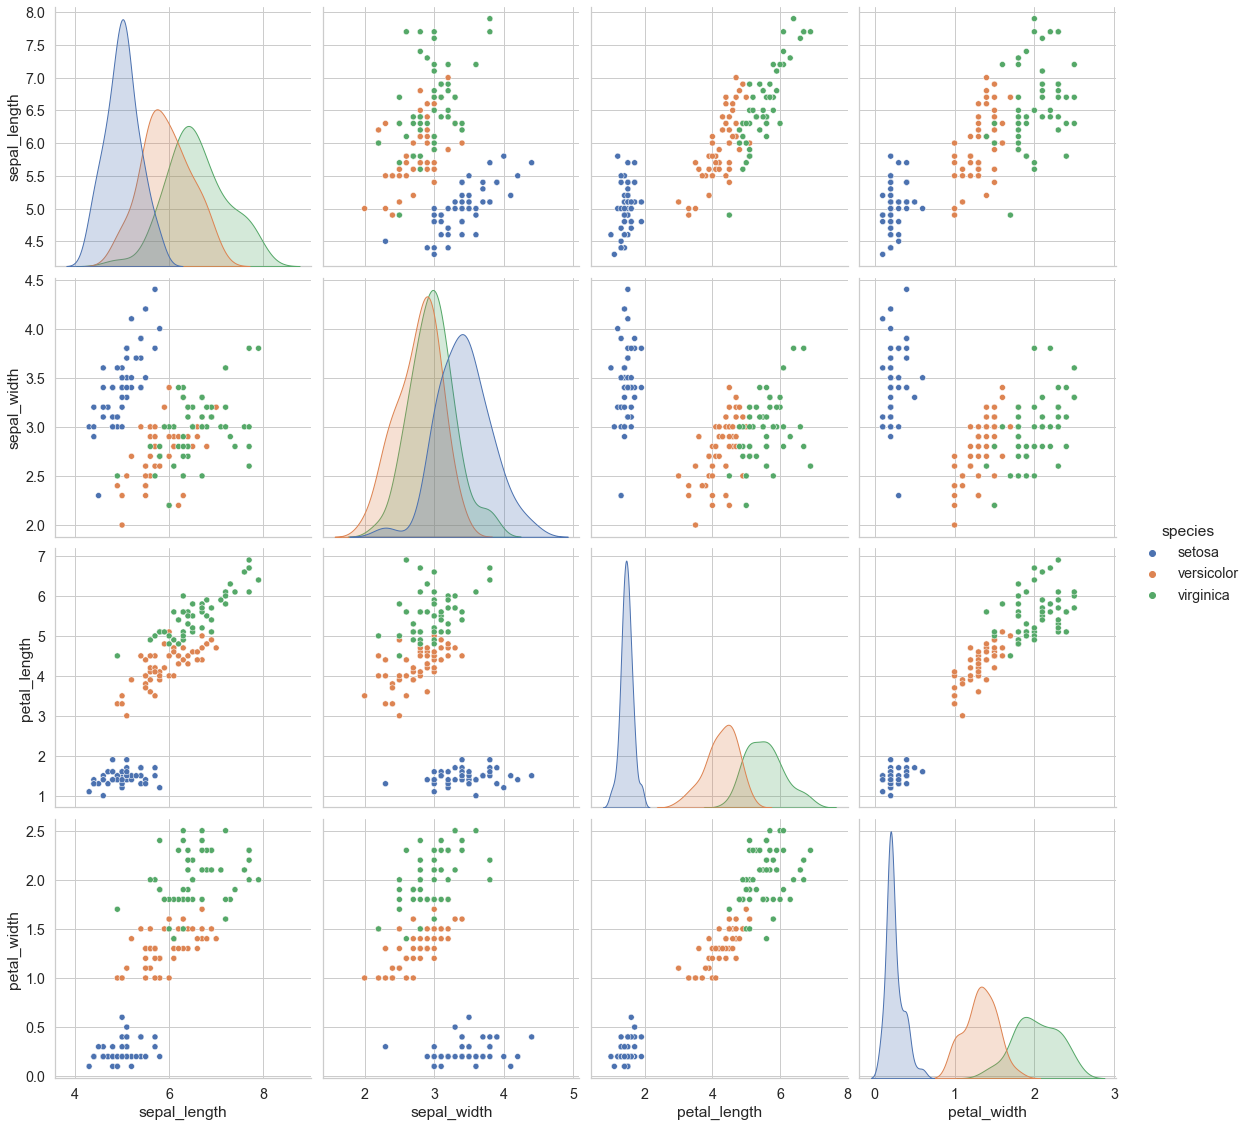

In [26]:
sns.pairplot(sns.load_dataset("iris"), hue="species", size=4);

As one can observe from this graph, one class (setosa) separates almost with no error. Other two are also almost linearly separable.

Therefore we anticipate very high classification quality.

## Data preprocessing

Here the scale of the features is almost the same for all the features thus there is no need to do rescaling. So we only need to do train/test splitting

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Table of results

It is important to track results of different experiments for the sake of further comparison.

In [28]:
results = pd.DataFrame(columns=["Accuracy"])

## Sklearn Logistic Regression

### Fitting

Here we're going to use very basic "Logistic regression" classification model.

Sklearn implementation of LogRegression implies mandatory usage of regularization (it almost always works better with it preventing overfitting). We want to explore very basic LogRegression model thus to "disable" regularization we need to reduce its impact to almost zero. It can be done by setting regularization constant $\lambda$ to very small value (in sklearn we define inverse regularization constant $C = 1 / \lambda$ thus we need to make it big)

In [29]:
# big C for switch off regularization
model = LogisticRegression(C=1e6, multi_class="multinomial", solver="lbfgs")

Fit the model

In [30]:
model.fit(X_train, y_train)

LogisticRegression(C=1000000.0, multi_class='multinomial')

In [31]:
model.coef_

array([[  4.32377123,   9.9343188 , -14.52699715,  -6.88137175],
       [ -1.0954019 ,  -1.53665751,   3.10941577,  -4.78887664],
       [ -3.22836933,  -8.3976613 ,  11.41758139,  11.67024839]])

### Evaluation

Let's see what features are significant for the model and for each class

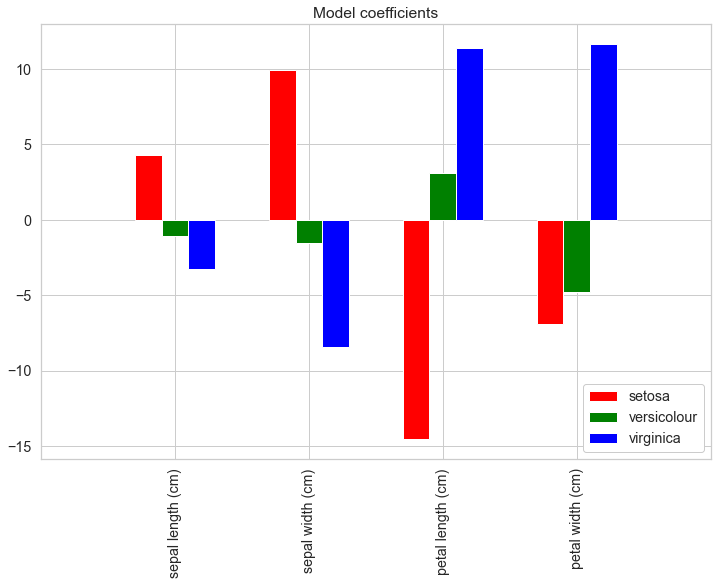

In [32]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(model.coef_.shape[1]) - 0.2, model.coef_[0], color="red", width=0.2, label="setosa")
plt.bar(np.arange(model.coef_.shape[1]) - 0.0, model.coef_[1], color="green", width=0.2, label="versicolour")
plt.bar(np.arange(model.coef_.shape[1]) + 0.2, model.coef_[2], color="blue", width=0.2, label="virginica")
plt.xticks(np.arange(model.coef_.shape[1]), X.columns, rotation='vertical')
plt.xlim([-1, model.coef_.shape[1]])
plt.title("Model coefficients")
plt.legend(loc="lower right");

It maybe interesting to compare this barchart with the pairwise feature distributions.

For example, in the barplot one can see that *sepal length* does not influence *versicolour* separating hyperplane. Indeed, let's take a look into the first column of the pairwise plot (*sepal length* is the x axis). As one can see, *versicolour* class is indistinguishable from other with the vertical lines in combination with every other feature as y-axis.

Predicting both train and test sets to evaluate model

In [33]:
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)

Accuracy scores

In [34]:
print("Train accuracy:", np.round(accuracy_score(y_train, preds_train), 3))
print("Test accuracy:", np.round(accuracy_score(y_test, preds_test), 3))

Train accuracy: 0.983
Test accuracy: 1.0


Add to the table of results:

In [35]:
results = results.append(pd.DataFrame(
        [np.round(accuracy_score(y_train, preds_train), 3), np.round(accuracy_score(y_test, preds_test), 3)], 
        columns=["Accuracy"], 
        index=["Sklearn Train", "Sklearn Test"]))

In [36]:
results

,Accuracy
Sklearn Train,0.983
Sklearn Test,1.000


Confusion matrices

In [37]:
cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

In [38]:
confusion_matrix(y_train, preds_train).astype(np.float32)

array([[40.,  0.,  0.],
       [ 0., 40.,  1.],
       [ 0.,  1., 38.]], dtype=float32)

Visualize them

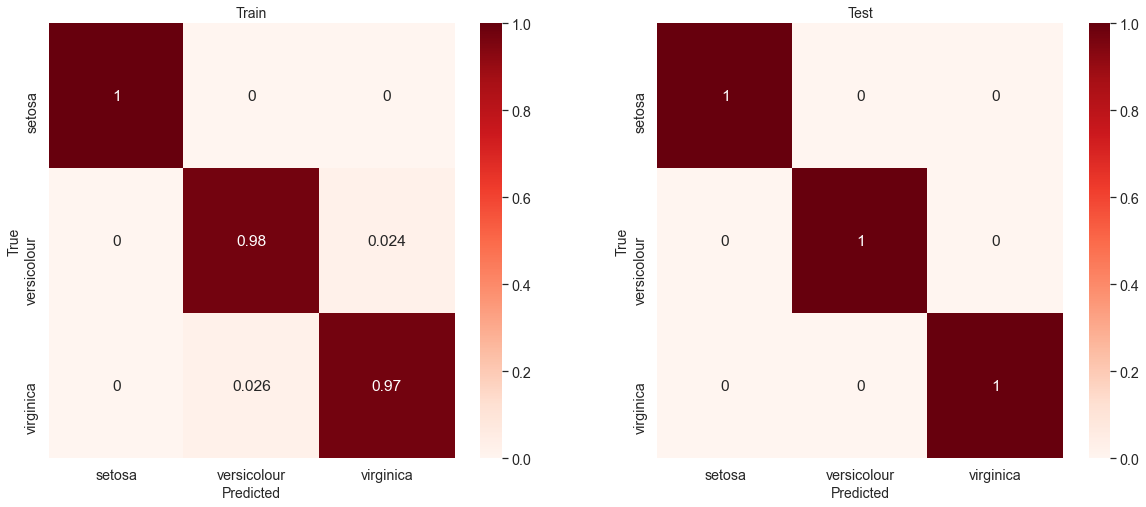

In [39]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test", fontsize=14);

As we suggested before, setosa perfectly separates from two other classes.

### Cross-Validation

The common method to evaluate the model is cross-validation. The idea behind it is to divide the whole set of objects into $k$ sections and then use one section as a test set and other $k-1$ as a train (repeat it with all the sections).

There is a special function for this in sklearn called $\text{KFold}$. It creates set of indices for cross-validation.

In [40]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_idx = list(cv.split(X_train, y_train))

Next step is to do everything that we've done before in a loop:
* Split
* Train
* Evaluate

And store the average value of the errors

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

acc = None
cm = None
estimator = [LogisticRegression(), RandomForestClassifier()]

for e in estimator:
    for train_idx, test_idx in cv_idx:

        # split
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # create logistic regression pipeline
        model = Pipeline([('scaler', MinMaxScaler()),
                          ('classifier', e)])

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # evaluate

        if acc is None:
            acc = accuracy_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred).astype(np.float32)
        else:
            acc += accuracy_score(y_test, y_pred)
            cm += confusion_matrix(y_test, y_pred)
        
# take the average value across all folds
acc /= cv.n_splits
cm /= cm.sum(axis=1)[:, np.newaxis]

In [42]:
print("CV accuracy:", np.round(acc, 3))

CV accuracy: 1.858


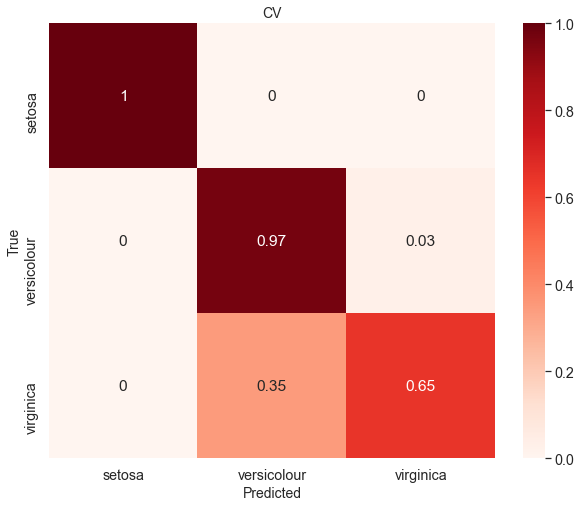

In [43]:
plt.figure(figsize=(10, 8))
g = sns.heatmap(cm, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("CV", fontsize=14);

## Pipeline for classification 

In [44]:
pipe_model = Pipeline([('scaler', MinMaxScaler()),
                  ('classifier', LogisticRegression())
                 ])

## Gridsearch to optimize hyperparameter selection for classification

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__penalty':['l1','l2'], 
              'classifier__C': [1, 10, 100, 1000, 10000]
             }

gs = GridSearchCV(pipe_model, param_grid, cv=5, verbose=2)

In [46]:
pipe_model.named_steps['classifier']

LogisticRegression()

In [47]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ............classifier__C=1, classifier__penalty=l1; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l1; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l1; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l1; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l1; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l2; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l2; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l2; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l2; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l2; total time=   0.0s
[CV] END ...........classifier__C=10, classifier__penalty=l1; total time=   0.0s
[CV] END ...........classifier__C=10, classifier

C:\Users\parna\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parna\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parna\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\parna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\parna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

[CV] END ........classifier__C=10000, classifier__penalty=l1; total time=   0.0s
[CV] END ........classifier__C=10000, classifier__penalty=l1; total time=   0.0s
[CV] END ........classifier__C=10000, classifier__penalty=l1; total time=   0.0s
[CV] END ........classifier__C=10000, classifier__penalty=l1; total time=   0.0s
[CV] END ........classifier__C=10000, classifier__penalty=l1; total time=   0.0s
[CV] END ........classifier__C=10000, classifier__penalty=l2; total time=   0.0s
[CV] END ........classifier__C=10000, classifier__penalty=l2; total time=   0.0s
[CV] END ........classifier__C=10000, classifier__penalty=l2; total time=   0.0s
[CV] END ........classifier__C=10000, classifier__penalty=l2; total time=   0.0s
[CV] END ........classifier__C=10000, classifier__penalty=l2; total time=   0.0s


C:\Users\parna\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parna\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parna\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\parna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\parna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [1, 10, 100, 1000, 10000],
                         'classifier__penalty': ['l1', 'l2']},
             verbose=2)

In [48]:
# best grid search parameters
gs.best_params_

{'classifier__C': 100, 'classifier__penalty': 'l2'}

In [49]:
# best estimator
s = gs.best_estimator_.named_steps['scaler']

In [50]:
# access logistic regression coefficients from best estimator
gs.best_estimator_.named_steps['classifier'].coef_

array([[ -4.18428018,   5.78075955, -10.55181289, -10.66768554],
       [  1.53290113,  -1.65922968,  -0.13276281,  -4.52368534],
       [  2.65137904,  -4.12152987,  10.68457571,  15.19137087]])

# Homegrown Logistic Regression

Below there is an implementation of multinomial logistic regression with raw python.

In [51]:
#%%writefile  HomegrownLogisticRegression.py

import numpy as np
import pandas as pd

class LogisticRegressionHomegrown(object):
    
    def __init__(self,  tol =1e-2):
        self.coef_ = None       # weight vector
        self.intercept_ = None  # bias term
        self._theta = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self.tol = tol
        self.history = {"cost": [], 
                        "coef": [], 
                        "intercept": [], 
                        "grad": [], 
                        "acc": []}
        
    # calculate gradient of objective function
    def _grad(self, X, y):
        # number of training examples
        n = X.shape[0]
        
        # get scores for each class and example
        # 2D matrix
        scores = self._predict_raw(X)
        
        # transform scores to probabilities
        # softmax
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # error
        probs[range(n),y] -= 1
        
        # gradient
        gradient = np.dot(X.T, probs) / n 
        #gradient = np.dot(X.T, probs) / n + 2 *eta *np.sum(self._theta[1:,], by 1)
        
        return gradient
    
    # full gradient descent, i.e., not stochastic gd
    def _gd(self, X, y, max_iter, alpha=0.05):
        for i in range(max_iter):
            #alternative stopping criteria based on the root satisfying FOC: gradient(W) eq  zeros
             # calculate gradient
            grad = self._grad(X, y)
            self.history["grad"].append(grad)
            if np.max(np.abs(grad)) < self.tol: ## gradient(W) == [[0.0001,0.001,0.000001,0.0], [0.0001,0.001,0.000001,0.0]]
                print(f"finished after gradient after {i} iterations: via np.max(np.abs(grad)) < self.tol:")
                break

            theta_old = self._theta.copy()
            self.history["coef"].append(self._theta[1:])
            self.history["intercept"].append(self._theta[0])
            
            metrics = self.score(X, y)
            self.history["cost"].append(metrics["cost"])
            self.history["acc"].append(metrics["acc"])

            
            # do gradient step
            self._theta -= alpha * grad

            # alternative stopping criteria based on the root estimate not changing
            if np.max(np.abs(theta_old - self._theta)) < self.tol: 
                print(f"finished after gradient after {i} iterations: via np.max(np.abs(theta_old - theta))")
                break


    
    # public API for fitting a linear regression model
    def fit(self, X, y, max_iter=1000):
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X = np.c_[np.ones(X.shape[0]), X]
        # initialize if the first step
        if self._theta is None:
            self._theta = np.random.rand(X.shape[1], len(np.unique(y)))
        
        # do full gradient descent
        self._gd(X, y, max_iter)
        
        # get final weigths and bias
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
    # computes logloss and accuracy for (X, y)
    def score(self, X, y):
        # number of training samples
        n = X.shape[0]
        
        # get scores
        scores = self._predict_raw(X)
        
        # trasnform scores to probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # logloss per each example
        corect_logprobs = -np.log(probs[range(n),y])
        
        # total mean logloss
        data_loss = np.sum(corect_logprobs) / n
        
        # predictions
        pred = np.argmax(scores, axis=1)
        # accuracy
        acc = accuracy_score(y, pred)
        
        # final metrics
        metrics = {"acc": acc, "cost": data_loss}
        
        return metrics
        
    # computes scores for each class and each object in X
    def _predict_raw(self, X):
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            scores = np.dot(X, self._theta)
        else:
            scores = np.dot(X, self.coef_) + self.intercept_
        scores -= np.max(scores, axis=1, keepdims=True)
        return scores
    
    # predicts class for each object in X
    def predict(self, X):
        # get scores for each class
        scores = self._predict_raw(X)
        # choose class with maximum score
        pred = np.argmax(scores, axis=1)
        return pred
    


Train accuracy: 0.967
Test accuracy: 1.0


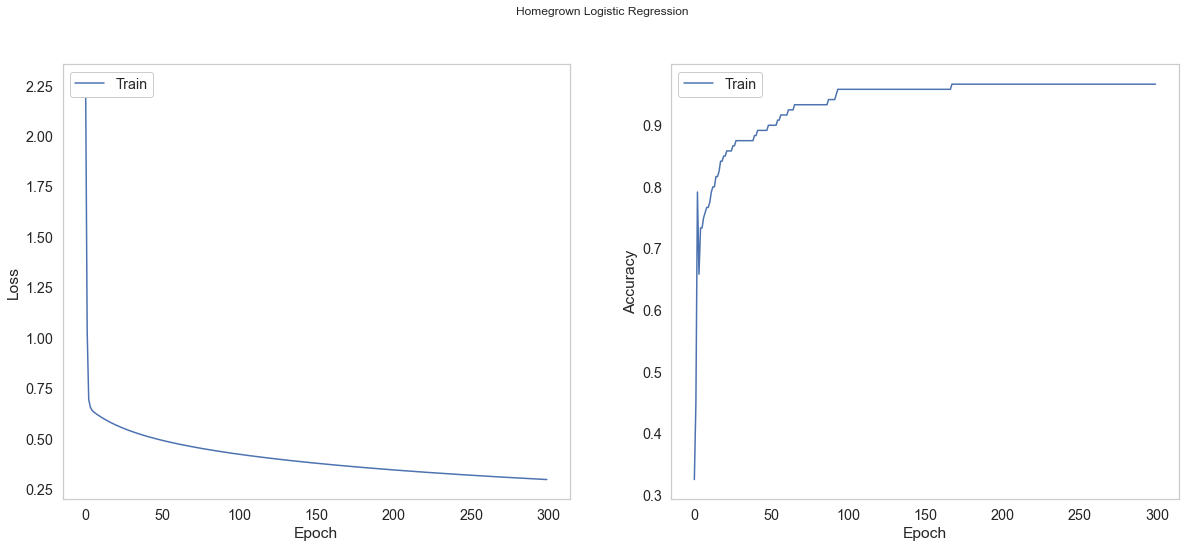

In [52]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from HomegrownLogisticRegression import LogisticRegressionHomegrown

%matplotlib inline
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_homegrown = LogisticRegressionHomegrown(tol = 1e-3)

model_homegrown.fit(X_train, y_train, max_iter=300)
plt.figure(figsize=(20, 8))
plt.suptitle("Homegrown Logistic Regression")
plt.subplot(121)
plt.plot(model_homegrown.history["cost"], label="Train")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.subplot(122)
plt.plot(model_homegrown.history["acc"], label="Train")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy");

#Evaluation

preds_train = model_homegrown.predict(X_train)
preds_test = model_homegrown.predict(X_test)

print("Train accuracy:", np.round(accuracy_score(y_train, preds_train), 3))
print("Test accuracy:", np.round(accuracy_score(y_test, preds_test), 3))
plt.grid()

#Train accuracy: 0.917
#Test accuracy: 0.833

## Fitting

In [53]:
model_homegrown.fit(X_train, y_train, max_iter=300)

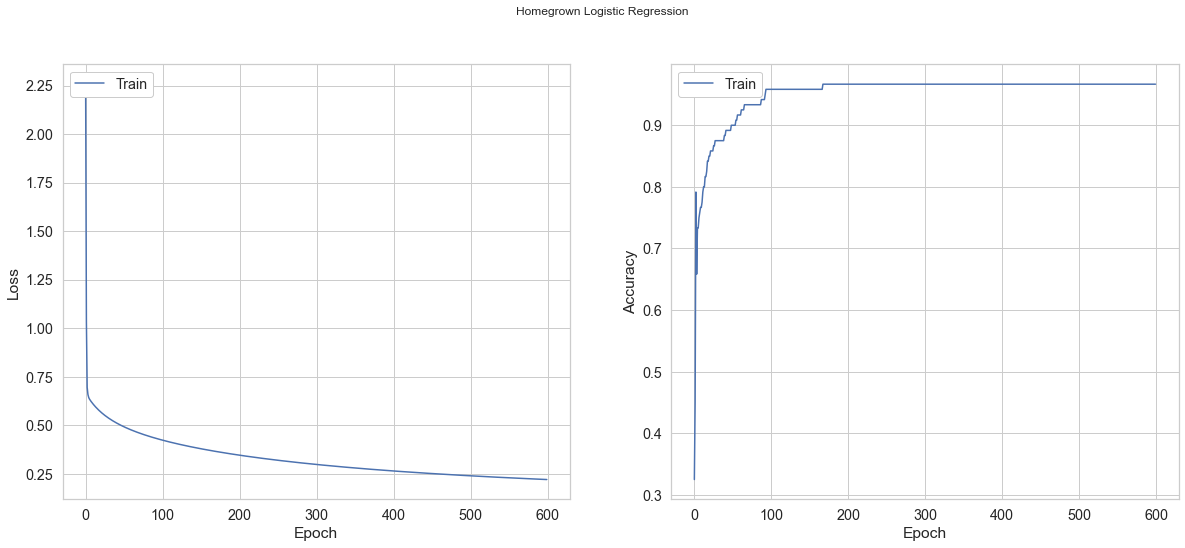

In [54]:
plt.figure(figsize=(20, 8))
plt.suptitle("Homegrown Logistic Regression")
plt.subplot(121)
plt.plot(model_homegrown.history["cost"], label="Train")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(122)
plt.plot(model_homegrown.history["acc"], label="Train")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy");

## Evaluation

In [55]:
preds_train = model_homegrown.predict(X_train)
preds_test = model_homegrown.predict(X_test)

In [56]:
print("Train accuracy:", np.round(accuracy_score(y_train, preds_train), 3))
print("Test accuracy:", np.round(accuracy_score(y_test, preds_test), 3))

Train accuracy: 0.967
Test accuracy: 1.0


In [57]:
results = results.append(pd.DataFrame(
        [np.round(accuracy_score(y_train, preds_train), 3), np.round(accuracy_score(y_test, preds_test), 3)], 
        columns=["Accuracy"], 
        index=["Homegrown Train", "Homegrown Test"]))

In [58]:
results

,Accuracy
Sklearn Train,0.983
Sklearn Test,1.000
Homegrown Train,0.967
Homegrown Test,1.000


In [59]:
cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

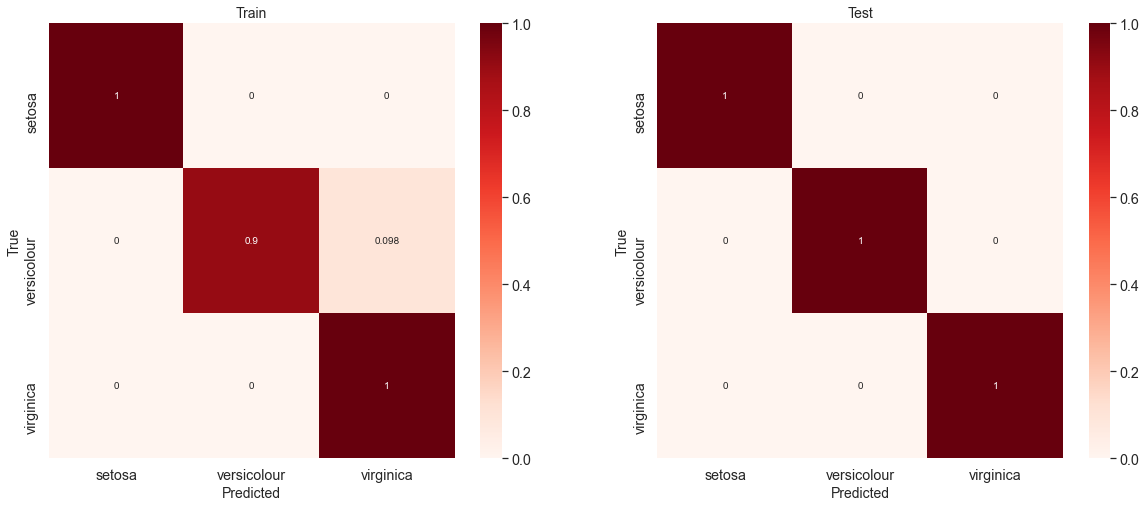

In [60]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test", fontsize=14);

# Comparison

In [61]:
results

,Accuracy
Sklearn Train,0.983
Sklearn Test,1.000
Homegrown Train,0.967
Homegrown Test,1.000


# Task: Extend homegrown logistic regression with L2 regularization

Task: extend the basic logistic regression with L2 regularization